# Principal Component Analysis

In this exercise sheet we look into how to compute and apply a Principal Component Analysis (PCA).

## Toy 4D Example

We start by loading our toy example. The data is stored as a Numpy array, it is a $2585\times 5$ matrix. The last component of each row is the label, the first four components are the coordinates in 4D. Each label is an integer from  $\{0, 1, 2, 3, 4\}$.

The data contains a noisy 2D plane which is embded into 4D. We would like to represent the data in its _intrinsic_ 2D form.

In [1]:
!pip install pillow  # install the Python package "pillow"
import numpy as np
import mllab.pca

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [81]:
pca_toy_4d = np.load("data/pca_toy_4d.npy")
y = pca_toy_4d[:, -1]  # labels
x = pca_toy_4d[:, :-1]  # 4D coordinates

Let us plot slices from this 4D data. We provide a helper function for this:

In [82]:
# Show documentation
mllab.pca.plot_toy_slice?

Signature: mllab.pca.plot_toy_slice(x, y, drop_dim)
Docstring:
Plot a slice of the 4D input data in our toy example.

A 3D scatter plot is generated by droping the dimension `drop_dim`. The
color of each plotted point is determined using the labels `y`.

Parameters
----------

x: (n, 4) array-like
y: (n,) array-like
    The labels.
drop_dim: int
    The dimension to cut, 1 indexed.
File:      ~/Documents/Uni/Studium/Bonn (Mathematik)/SS 2025/Practical Lab/Sheet 03/mllab/pca/__init__.py
Type:      function


Scatter plot to drop the 4th dimension


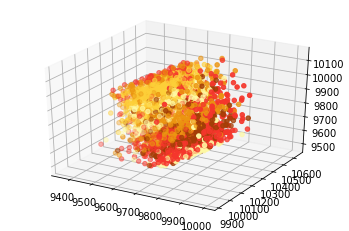

Scatter plot to drop the 3th dimension


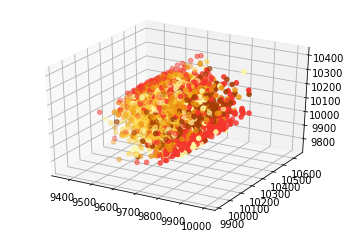

Scatter plot to drop the 2th dimension


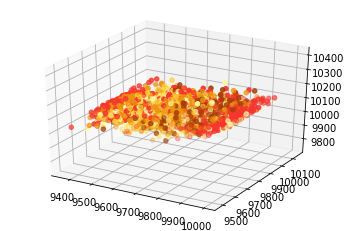

In [ ]:
# Scatter plot for dropping the 4th dimension
print('Scatter plot after dropping the 4th  dimension')
mllab.pca.plot_toy_slice(x, y, drop_dim=4)
# Scatter plot for dropping the 3th dimension
print('Scatter plot after dropping the 3rd dimension')
mllab.pca.plot_toy_slice(x, y, drop_dim=3)
# Scatter plot for dropping the 2th dimension
print('Scatter plot after dropping the 2nd dimension')
mllab.pca.plot_toy_slice(x, y, drop_dim=2)


We want to remove the noise and recover the 2D information.

### Task 3.1

Write an implementation of the function below. Use a singular value decomposition (SVD), but avoid computing it completely since we only need the first $q$ eigenvectors. Remember to sort the eigenvalues accordingly. You can use a NumPy/SciPy function for this. Note: It might not return ordered eigenvalues.

In [2]:
from scipy.sparse.linalg import svds

def pca(x, q):
   """
    Compute principal components and the coordinates.
    
    Parameters
    ----------
    
    x: (n, d) NumPy array
    q: int
       The number of principal components to compute.
       Has to be less than `d`.

    Returns
    -------
    
    Vq: (d, q) NumPy array, orthonormal vectors (column-wise)
    xq: (n, q) NumPy array, coordinates for X (row-wise)
   """

   # Number of observations
   n = x.shape[0]
   # Dimension of the data set 
   d = x.shape[1] 
   # Controll structures for Parameters
   if q >= d:
      raise ValueError('q has to be less than d')
   
   # Calcualte the mean xbar
   xbar = np.mean(x, axis = 0)

   # Construct the matrix X with X_i = x_i - xbar
   X = x - xbar

   # Compute the SVD of X
   _, _, VT = np.linalg.svd(X)

   VT = VT[0:q,:]
   Vq = VT.T

   # Compute the new projected coordiates
   xq = np.zeros((n,q))
   for i in range(n):
      xq[i] = np.dot(Vq.T, X[i])
      
   return Vq, xq


Now we can compute the 2D dimensional representation of `x` using PCA.

In [89]:
V, xq = pca(x, q=2)

### Task 3.2 a

And then plot the coordinates `xq`, which are two dimensional. We provide a helper function for this task. Let us check how to use it:

In [90]:
mllab.pca.plot_toy_2d?

Signature: mllab.pca.plot_toy_2d(x, y)
Docstring:
Plot the low-dimensional representation of the toy data.

The function uses a colored scatter plot where each point is
from `x` and the color is determined by the labels `y`.

Parameters
----------

x: (n, 2) array-like
    The two dimensional representation.
y: (n,) array-like
   The labels.
File:      ~/Documents/Uni/Studium/Bonn (Mathematik)/SS 2025/Practical Lab/Sheet 03/mllab/pca/__init__.py
Type:      function


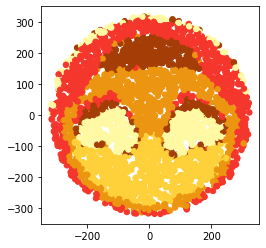

array([[ -29.72974835,  279.96066025],
       [ -38.30083255,  114.04890304],
       [  73.55131296, -229.82223422],
       ...,
       [ -29.35961355, -223.3692692 ],
       [-230.8908039 ,   43.05643437],
       [  50.48254457,  -26.59078233]])

In [ ]:
# Scatter plot for the projected data 
mllab.pca.plot_toy_2d(xq,y)

Hopefully you appreciate the result.

### Task 3.2 b

Let us see how PCA handles a non-linear transformation. To test this we map our data into 3D by keeping the y-axis as the new z-axis and bending x-coordinate onto an ellipse.

In [92]:
mllab.pca.map_on_ellipse?

Signature: mllab.pca.map_on_ellipse(xq, a=4, b=1, gap_angle=90)
Docstring:
Map 2D points on bend ellipse in 3D.

Parameters
----------

xq: (n, 2) array-like
    The 2D points
a, b: non-negative, scalar
    Ellipsis axis
gap_angle: scalar in [0,360)
    Degree of the gap the bend ellipse should have.
    E.g. for 0 the data is mapped onto a closed ellipse.

Returns
-------

xyz: (n, 3) array-like
    Mapped 3D points
File:      ~/Documents/Uni/Studium/Bonn (Mathematik)/SS 2025/Practical Lab/Sheet 03/mllab/pca/__init__.py
Type:      function


In [94]:
mllab.pca.map_on_ellipse(xq, a=32, b=1, gap_angle=90)

array([[-193.67397536,   -0.27683838,   78.94156985],
       [-133.85167319,   -4.38300798,    7.93576609],
       [  -4.55040631,   -6.05697085,  -19.34843984],
       ...,
       [ 162.78181021,    3.2909336 , -112.07816475],
       [-169.29738249,   -2.95250222, -197.18292709],
       [ 190.70772083,   -1.09091274,   36.58207985]])

In [95]:
xyz = mllab.pca.map_on_ellipse(xq, a=32, b=1, gap_angle=90)

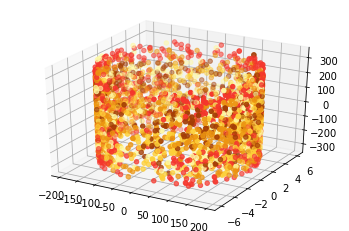

In [96]:
#matplotlib notebook
mllab.pca.plot_toy_3d(xyz, y)

In [ ]:
# Taks 3.2
# Perform the PCA for the transformed 3D dataset for q=2
_, xyzq = pca(xyz, q=2)

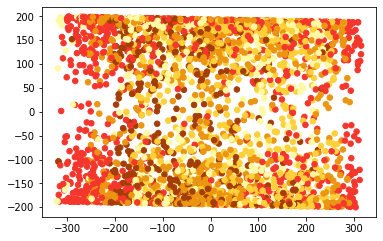

array([[ -75.14923874,  195.09786976],
       [  -5.3221067 ,  133.90354156],
       [  19.43490444,    4.09536822],
       ...,
       [ 108.87738469, -165.01886149],
       [ 200.44838614,  165.33960741],
       [ -40.29720734, -190.03670715]])

In [ ]:
# Scatter plot for the projected transformed data 
mllab.pca.plot_toy_2d(xyzq,y)

**(Remeber to stop the interactive plot by pressing the shutdown icon!)**

Now apply PCA to our transformed data and plot the result as before.

Scatter plot for gap angle: 0


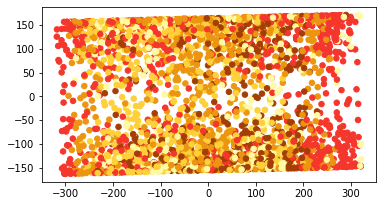

Scatter plot for gap angle: 90


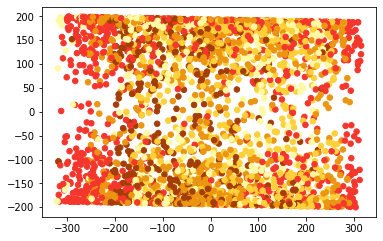

Scatter plot for gap angle: 180


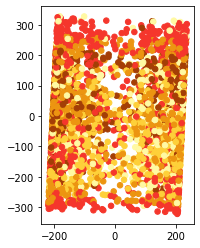

Scatter plot for gap angle: 270


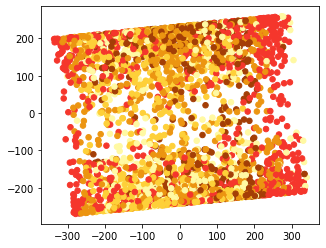

Scatter plot for gap angle: 360


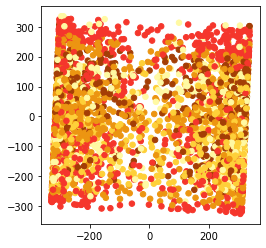

Scatter plot for b: 1


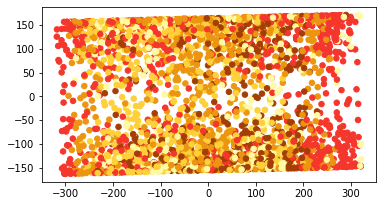

Scatter plot for b: 2


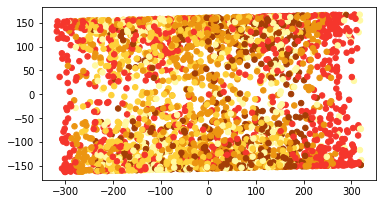

Scatter plot for b: 4


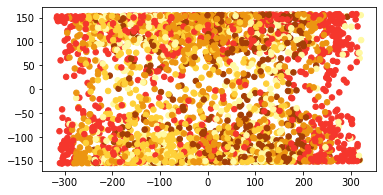

Scatter plot for b: 8


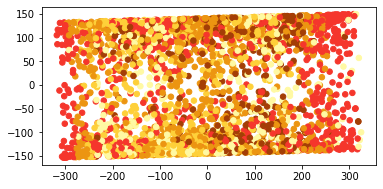

Scatter plot for b: 20


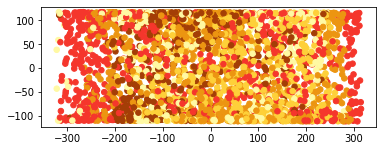

Scatter plot for a: 5


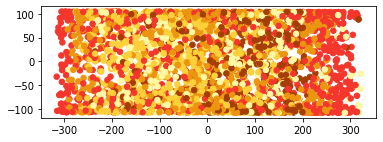

Scatter plot for a: 10


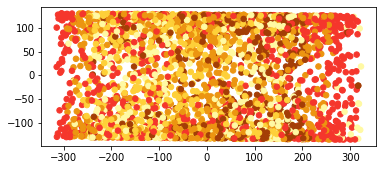

Scatter plot for a: 20


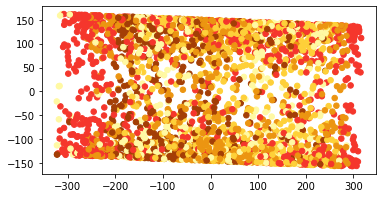

Scatter plot for a: 30


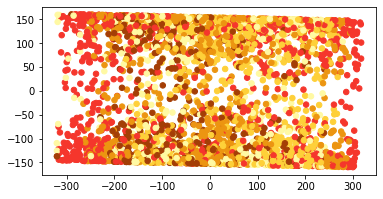

In [103]:
%matplotlib inline
# Taks 3.2b continued 
# Comment: We fix the ellipces axis a,b and plot the scatter plot for the projected transformed data for various angles angle_vals
angle_vals = [0,90,180,270,360]
for angle in angle_vals:
    # Transform the data by mapping onto ellipse for gap_angle = angle 
    xyz = mllab.pca.map_on_ellipse(xq, a=32, b=1, gap_angle=angle)
    # Perform PCA for q = 2 on the transfomred data 
    _, xyzq = pca(xyz, q=2)
    # Scatter plot for the projected transformed data 
    print('Scatter plot for gap angle:', angle)
    mllab.pca.plot_toy_2d(xyzq, y)

# Comment: We now fix the gap_angle and consider different shapes, i.e. different values for a and b
a_vals = [5,10,20,30]
b_vals = [1,2,4,8,20]

for b in b_vals:
    # Transform the data by mapping onto ellipse
    xyz = mllab.pca.map_on_ellipse(xq, a=32, b=b, gap_angle=0)
    # Perform PCA for q = 2 on the transfomred data 
    _, xyzq = pca(xyz, q=2)
    # Scatter plot for the projected transformed data 
    print('Scatter plot for b:', b)
    mllab.pca.plot_toy_2d(xyzq, y)

for a in a_vals: 
    # Transform the data by mapping onto ellipse
    xyz = mllab.pca.map_on_ellipse(xq, a=a, b=4, gap_angle=0)
    # Perform PCA for q = 2 on the transfomred data 
    _, xyzq = pca(xyz, q=2)
    # Scatter plot for the projected transformed data 
    print('Scatter plot for a:', a)
    mllab.pca.plot_toy_2d(xyzq, y)


Could be worse, but undeniably discomforting. Try different axes lengths and gap sizes of the ellipse, especially try increasing b. What do you observe?

### Task 3.3 a

We want to see if PCA can improve the accuracy of separating hyperlanes. First compute the singular values of the Iris dataset, then check how many percent of the variance the first two principal components capture.

In [5]:
from sklearn.datasets import load_iris
iris = load_iris()
iris_x = iris['data']
iris_y = iris['target']

In [6]:
# Task 3.3.a.)
def percentage_captured_variance(x, q):
    """
    Compute percentage of captured variance 
    
    Parameters
    ----------
    
    x: (n, d) NumPy array
    q: int
       The number of principal components to compute.
       Has to be less than `d`.

    Returns
    -------
    pcv: float
        Captured variance from the q principal components
   """
    
    # Center the feature data
    xbar = np.mean(x, axis = 0)
    X = x - xbar

    # Compute the singular values of the matrix X
    _, svals,_ = np.linalg.svd(X, full_matrices=False)
    # Compute the eigenvalues of the matrix X*X^T. Note that the eigenvalues of of X*X^T are the squared sigular values of X
    eigvals = svals**2

    sum = 0
    for i in range(q):
        sum += eigvals[i]

    pcv = sum / np.sum(eigvals)
    return pcv

# Compute the captured variance by principal components for Irsis data set 
print('Principal Compontent Analyis for the Iris data set')
print(f"Percentage of variance by first principal component: {percentage_captured_variance(iris_x, 1)*100:.3f}%")
print(f'Percentage of variance by first and second principal component:  {percentage_captured_variance(iris_x, 2)*100:.3f}%')

Principal Compontent Analyis for the Iris data set
Percentage of variance by first principal component: 92.462%
Percentage of variance by first and second principal component:  97.769%


### Task 3.3 b

Now apply PCA and compute the first two principal components. Plot the projected 2D data in a scatter plot such that the three labels are recognizable. What do you observe?

In [7]:
import matplotlib.pyplot as plt

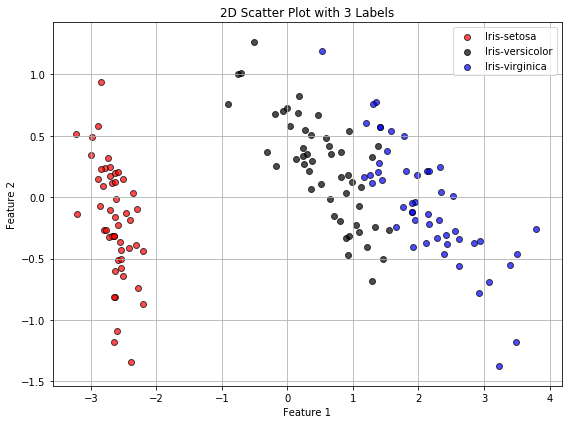

In [ ]:
# Apply the PCA for the Iris data set for first two principal components
V, xq = pca(iris_x, q=2)

# 2D Scatter plot with first and second principal components
plt.figure(figsize=(8, 6))
colors = ['red', 'black', 'blue']
labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
for i in range(3):
    plt.scatter(xq[iris_y == i, 0], xq[iris_y == i, 1], c=colors[i], label=labels[i], alpha=0.7, edgecolors='k')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('2D Scatter Plot of ')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
def plot_1d_iris(a, b, c):
    """Show a 1D plot of three 1D datasets a, b and c.
    
    Top to bottom plotted in order is a, b, c."""
    af = a.flatten()
    bf = b.flatten()
    cf = c.flatten()
    left = min(x.min() for x in (af, bf, cf))
    right = max(x.max() for x in (af, bf, cf))
    for i, (x, cf) in enumerate(((af, 'red'), (bf, 'blue'), (cf, 'green'))):
        plt.hlines(i * .3, left, right, linestyles='dotted', colors=[(.8,.8,.8,1)])
        plt.eventplot(x, colors=cf, linewidths=.5, linelengths=.25, lineoffsets=(2 - i) * .3 )
    plt.axis('off')


1D classification plot


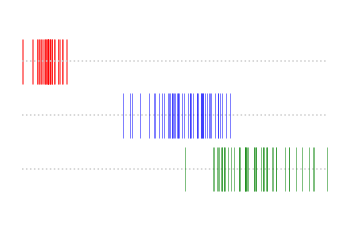

In [ ]:
# Apply the PCA for the Iris data set for first principal component
V, xq = pca(iris_x, q=1)

# Extract the predicted classification
xq_1 = xq[iris_y == 0]
xq_2 = xq[iris_y == 1]
xq_3 = xq[iris_y == 2]

# 1D plot 
print('1D classification plot')
plot_1d_iris(xq_1, xq_2, xq_3)

### Task 3.3 c

Finally, recompute the accurancy as in sheet 1 and compare the results. Remember to separate the data into train and test set.

In [ ]:
from numpy.linalg import lstsq
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier

#import pca as pca

def labels(x1, x2):
    return np.concatenate((np.zeros(x1.shape[0], dtype='int'), np.ones(x2.shape[0], dtype='int')))

In [ ]:
def pca(x_train, x_test, q):
   """
    Compute principal components and the coordinates.
    
    Parameters
    ----------
    
    x: (n, d) NumPy array
    q: int
       The number of principal components to compute.
       Has to be less than `d`.

    Returns
    -------
    
    Vq: (d, q) NumPy array, orthonormal vectors (column-wise)
    xq: (n, q) NumPy array, coordinates for X (row-wise)
   """

   # Number of observations
   n_train = x_train.shape[0]
   # Dimension of the data set 
   d = x_train.shape[1] 

   # Controll structures for Parameters
   if q > d:
      raise ValueError('q has to be less than d')
   
   # Calcualte the mean xbar
   xbar = np.mean(x_train, axis = 0)

   # Construct the matrix X with X_i = x_i - xbar
   X_train = x_train - xbar

   # Compute the SVD of X
   _, _, VT = np.linalg.svd(X_train)

   VT = VT[0:q,:]
   Vq = VT.T

   # Compute the new projected coordiates for the data x
   xq_train = np.zeros((n_train,q))
   for i in range(n_train):
      xq_train[i] = np.dot(Vq.T, X_train[i])

   # Compute the projected coordinates for the data x_test from the PCA on the data x
   X_test = x_test - xbar
   n_test = x_test.shape[0]
   xq_test = np.zeros((n_test,q))
   for i in range(n_test):
      xq_test[i] = np.dot(Vq.T, X_test[i]) 

   return Vq, xq_train, xq_test

In [ ]:
# Set the dimensions for the PCA
dims = [4,2,1]

# Split the sample into training and test data with 50 data points for the training sample
x_train, x_test, y_train, y_test = train_test_split(iris_x, iris_y, test_size = 50, random_state = 42, stratify=iris_y)

for d in dims: 
    # Create an instance of PCA
    #pca = PCA(n_components = d)
    # Transform the training data from PCA on the training data
    #xq_train = pca.fit_transform(x_train)
    # Transform the test data based on the PCA on the training data 
    #xq_test = pca.transform(x_test)

    _,xq_train,xq_test = pca(x_train, x_test, d)


    # Run a SVM on the training data xq_train with one vs. rest and intercept
    svm = LinearSVC(max_iter=10000, multi_class='ovr', fit_intercept=True)
    svm.fit(xq_train, y_train)

    # Predict values on the training data
    y_pred_train = svm.predict(xq_train)
    # Accuary on the training data
    acc_train = accuracy_score(y_train, y_pred_train, normalize=True)

    # Validate the model on the test data
    y_pred_test = svm.predict(xq_test)
    acc_test = accuracy_score(y_test, y_pred_test, normalize=True)

    print(f'SVM classification on PCA transformed features with {d} principal components')
    print(f'Accuracy on the training data:  {acc_train*100:.2f}%')
    print(f'Accuracy on the test data:  {acc_test*100:.2f}%')
    print('-------------------------------------------------')


SVM classification on PCA transformed features with 4 principal components
Accuracy on the training data:  97.00%
Accuracy on the test data:  86.00%
-------------------------------------------------
SVM classification on PCA transformed features with 2 principal components
Accuracy on the training data:  96.00%
Accuracy on the test data:  94.00%
-------------------------------------------------
SVM classification on PCA transformed features with 1 principal components
Accuracy on the training data:  93.00%
Accuracy on the test data:  96.00%
-------------------------------------------------


## Pedestrian Classification

### Task 3.4 a

__Read the pedestrian dataset into a NumPy array and normalize to [0,1]__

In [47]:
import mllab.pca
mllab.pca.load_pedestrian_images?

Signature: mllab.pca.load_pedestrian_images(split, label)
Docstring:
Load test/train images from the pedestrian dataset.


Parameters
----------

split: str
    Either 'train' or 'test', to specify if training or testing data shall
    be returned.
label: bool
    Specifies whether the images with or without pedestrians shall
    be returned.

Returns
-------

images: ndarray
    A NumPy array with shape (N, 100, 50, 3) representing pixel values of
    the images. Each image is 100x50 and has three color channels (RGB).
    The pixel values are in the range [0, 255].
File:      ~/Documents/Uni/Studium/Bonn (Mathematik)/SS 2025/Practical Lab/Sheet 03/mllab/pca/__init__.py
Type:      function


In [ ]:
# Load the training data without pedestrians
train_no_ped = mllab.pca.load_pedestrian_images('train', False)
# Load the trainig data with pedestrians
train_ped = mllab.pca.load_pedestrian_images('train', True)

# Load the test data without pedestrians
test_no_ped = mllab.pca.load_pedestrian_images('test', False)
# Load the test data with pedestrians
test_ped = mllab.pca.load_pedestrian_images('test', True)

# Normalize the pixels to [0,1]
train_no_ped = train_no_ped /255.0
train_ped = train_ped/255.0
test_no_ped = test_no_ped/255.0
test_ped = test_ped /255.0

# Parameters for the images
h,w,c = 100,50,3


In [ ]:
# Reshape the data from (N, 100,50,3) to (N, 15000) for the training and test data sets
train_no_ped_reshape = train_no_ped.reshape(train_no_ped.shape[0], h*w*c)
train_ped_reshape = train_ped.reshape(train_ped.shape[0], h*w*c)
test_no_ped_reshape = test_no_ped.reshape(test_no_ped.shape[0], h*w*c)
test_ped_reshape = test_ped.reshape(test_ped.shape[0], h*w*c)

# Construct the features by stacking the features for np pedestrians and pedestrians
X_train = np.vstack((train_no_ped_reshape, train_ped_reshape))
# Construct the labels for training data by stacking the labels for no pedestrians and pedestrians
y_train =  np.hstack(   (np.zeros(train_no_ped_reshape.shape[0]), np.ones(train_ped_reshape.shape[0])))


# Construct the features for the test data 
X_test = np.vstack((test_no_ped_reshape, test_ped_reshape))
# Construct the labels for the test data 
y_test =  np.hstack(   (np.zeros(test_no_ped_reshape.shape[0]), np.ones(test_ped_reshape.shape[0])))


(1000, 15000)


### Task 3.4 b

__Write a function to plot an image__

In [145]:
import matplotlib.pyplot as plt
import matplotlib as mpl

def plot_im(im, ax=None, vmin = 0, vmax = 1, title=None):
    """
    Plot a (normalized) image.
    
    Parameters
    ----------
    
    im: (1250,) array-like
    """

    if ax is None:
        fig, ax = plt.subplots()

    ax.imshow(im, vmin=vmin, vmax=vmax)
    ax.axis('off')



__Plot 10 randomly chosen images showing a pedestrian, and 10 randomly chosen images not showing a pedestrain.__

Plot for 10 randomly chosen images with no pedestrian


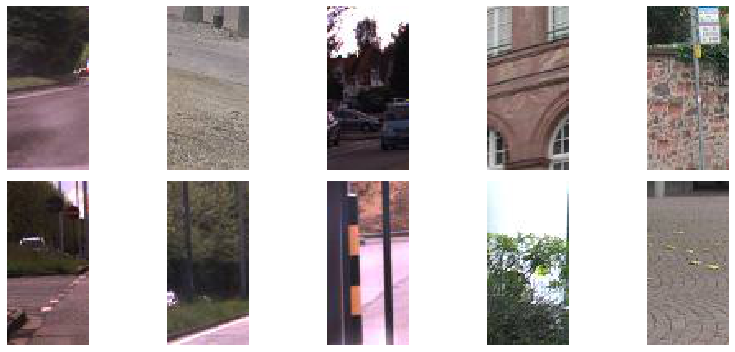

Plot for 10 randomly chosen images with pedestrian


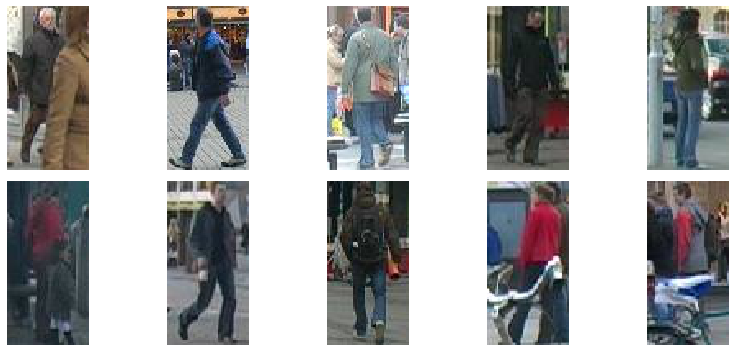

In [ ]:
# Extract 10 randomly chosen indices from the training data with no pedestrians
indices_no_ped = np.random.randint(0, train_no_ped.shape[0] , size = 10)
images_no_ped = train_no_ped[indices_no_ped]

# Plot the 10 images with no pedestrian
print("Plot for 10 randomly chosen images with no pedestrian")
fig, axes = plt.subplots(2, 5, figsize=(12, 5))  
axes = axes.flatten()  

for i in range(10):
    plot_im(images_no_ped[i], ax=axes[i])

plt.tight_layout()
plt.show()


# Extract 10 randomly chosen indices from the training data with pedestrians
indices_ped = np.random.randint(0, train_ped.shape[0] , size = 10)
images_ped = train_ped[indices_ped]

# Plot the 10 images with no pedestrian
print("Plot for 10 randomly chosen images with pedestrian")
fig, axes = plt.subplots(2, 5, figsize=(12, 5))  
axes = axes.flatten()  

for i in range(10):
    plot_im(images_ped[i], ax=axes[i])

plt.tight_layout()
plt.show()

### Task 3.5 a

__Compute the PCA of the full training set for $q=200$__

In [ ]:
from sklearn.decomposition import PCA

In [147]:
# Set parameters for dimensionalty reduction
q = 200
# Create an instance of PCA 
pca = PCA(n_components = q)

# Transform the training data X_train from the PCA on the training data X_train
xq_train = pca.fit_transform(X_train)

# Transform the test data X_test based on the PCA on the training data X_train
xq_test = pca.transform(X_train)

# Percentage of captured variance from the PCA with q=200
pcv = pca.explained_variance_ratio_.sum()
print(f'Percentage of captured variance by PCA with {q} principal components: {pcv:.4f}')


Percentage of captured variance by PCA with 200 principal components: 0.9593


### Task 3.5 b

__Plot the eigenpedestrian 1-20, 51-60, and 111-120__

In [ ]:
# Extract the orthonormal eigenvectors and reshape each eigenvector into (H,W,C)
eigenpedestrians = pca.components_
eigenpedestrians_reshaped = eigenpedestrians.reshape(q, h, w, c) 

Plot for the eigenpedestrians 1-20


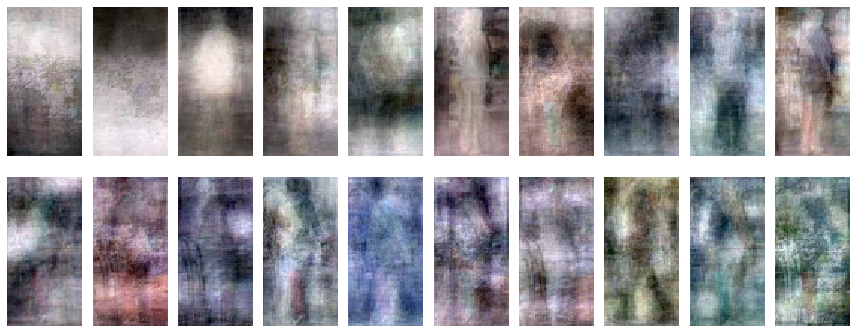

Plot for the eigenpedestrians 51-60


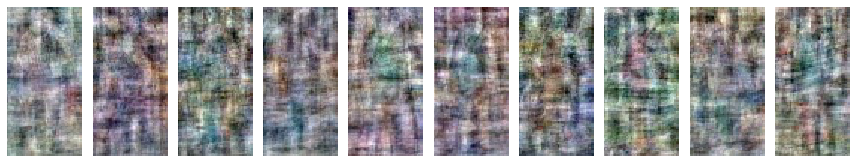

Plot for the eigenpedestrians 111-120


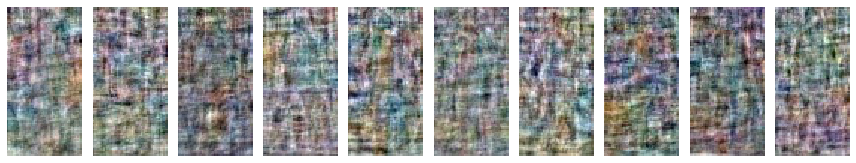

In [ ]:
print('Plot for the eigenpedestrians 1-20')
fig, axes = plt.subplots(2, 10, figsize=(12, 5))  
axes = axes.flatten() 

for id in range(20): 
    eigenped = eigenpedestrians_reshaped[id]
    min = eigenped.min()
    max = eigenped.max()
    eigenped_normalized = (eigenped - min) / (max - min)

    plot_im(eigenped_normalized, ax=axes[id])

plt.tight_layout()
plt.show()

print('Plot for the eigenpedestrians 51-60')
fig, axes = plt.subplots(1, 10, figsize=(12, 5))  
axes = axes.flatten() 

for id in range(10): 
    eigenped = eigenpedestrians_reshaped[50+id]
    min = eigenped.min()
    max = eigenped.max()
    eigenped_normalized = (eigenped - min) / (max - min)

    plot_im(eigenped_normalized, ax=axes[id])

plt.tight_layout()
plt.show()


print('Plot for the eigenpedestrians 111-120')
fig, axes = plt.subplots(1, 10, figsize=(12, 5))  
axes = axes.flatten() 

for id in range(10): 
    eigenped = eigenpedestrians_reshaped[110+id]
    min = eigenped.min()
    max = eigenped.max()
    eigenped_normalized = (eigenped - min) / (max - min)

    plot_im(eigenped_normalized, ax=axes[id])

plt.tight_layout()
plt.show()


### Task 3.6

__Compute the scores for a linear SVM using increasing numbers of principal components__

Use 10 to 200 components in steps of 5. Train the linear SVM with $C=0.01$ and increse the maximum number of iterations for the solver. You can reuse the computed PCA from above.

In [ ]:
from sklearn.svm import LinearSVC

Plot the training and test scores over $q$.

In [193]:
q_max = 200
# Create an instance of PCA with all 200 principal components
pca_full = PCA(n_components = q_max)
pca_full.fit(X_train)

# Lists to store the accuracy of the SVM on the training and test data
accuracy_train = []
accuracy_test = []

# Train 
for q in range(10,201):

    # Use the first q components of the full PCA with q_max = 200
    V_q = pca_full.components_[:q] 
    X_train_centered = X_train - pca_full.mean_
    # Project original data onto the q components
    X_train_projected = np.dot(X_train_centered, V_q.T)  

    X_test_centered = X_test - pca_full.mean_
    X_test_projected = np.dot(X_test_centered, V_q.T)  

    # Run a SVM on the training data xq_train with one vs. rest and intercept
    svm = LinearSVC(max_iter=10000, multi_class='ovr', C=0.01, fit_intercept=True)
    svm.fit(X_train_projected, y_train)

    # Predict values on the training data
    y_pred_train = svm.predict(X_train_projected)
    # Accuary on the training data
    acc_train = accuracy_score(y_train, y_pred_train, normalize=True)
    # Append the traing accuracy
    accuracy_train.append(acc_train)

    # Validate the model on the test data
    y_pred_test = svm.predict(X_test_projected)
    acc_test = accuracy_score(y_test, y_pred_test, normalize=True)
    # Append the st accuracy
    accuracy_test.append(acc_test)

    print(f'SVM classification on PCA transformed features with {q} principal components')
    print(f'Accuracy on the training data:  {acc_train*100:.2f}%')
    print(f'Accuracy on the test data:  {acc_test*100:.2f}%')
    print('-------------------------------------------------')


SVM classification on PCA transformed features with 10 principal components
Accuracy on the training data:  80.75%
Accuracy on the test data:  81.40%
-------------------------------------------------
SVM classification on PCA transformed features with 11 principal components
Accuracy on the training data:  82.05%
Accuracy on the test data:  81.90%
-------------------------------------------------
SVM classification on PCA transformed features with 12 principal components
Accuracy on the training data:  82.10%
Accuracy on the test data:  82.20%
-------------------------------------------------
SVM classification on PCA transformed features with 13 principal components
Accuracy on the training data:  81.25%
Accuracy on the test data:  82.50%
-------------------------------------------------
SVM classification on PCA transformed features with 14 principal components
Accuracy on the training data:  81.10%
Accuracy on the test data:  82.00%
-------------------------------------------------


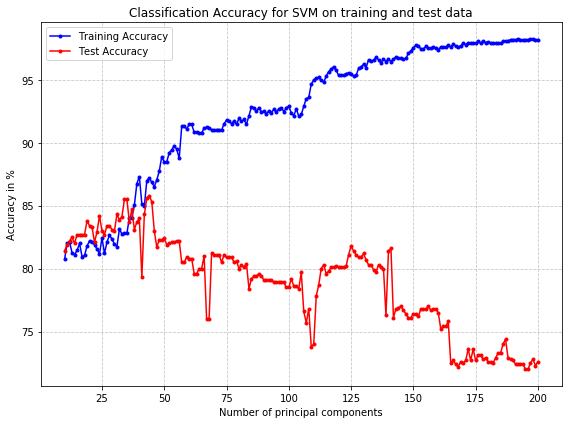

In [217]:
# Plot the training data accuary and the test data accracy against the principal components
x = np.arange(10,201,1)
accuracy_train = np.array(accuracy_train)
accuracy_test = np.array(accuracy_test)

plt.figure(figsize=(8, 6))
plt.plot(x, accuracy_train*100, label='Training Accuracy', color='blue', marker = '.')
plt.plot(x, accuracy_test*100, label='Test Accuracy', color='red', marker = '.')
plt.xlabel('Number of principal components')
plt.ylabel('Accuracy in %')
plt.title('Classification Accuracy for SVM on training and test data')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Task 3.7

## HOG Features

We decided to provide the implementation of the HOG features. (Task 3.7 a). 

Bonus Task (only 3.7 b): Compute the HOG features of the test data. Then apply PCA and calculate the scores

In [ ]:
import numpy as np
import scipy.ndimage as ndimage
from numpy.linalg import norm
from scipy.ndimage.filters import convolve


class HogFeatures:
    def __init__(self, im_shape, n_bins=9, cell_size=8, blk_size=2, unsigned=True, clip_val=.2):
        self.deg_range = np.pi if unsigned else 2 * np.pi
        self.n_bins = n_bins
        self.bins = np.linspace(0, self.deg_range, n_bins, endpoint=False)
        self.bin_size = self.deg_range / n_bins
        self.cell_size = cell_size
        self.blk_size = blk_size
        self.clip_val = clip_val

        self.im_h, self.im_w = im_shape
        x, y = np.arange(self.im_w), np.arange(self.im_h)
        
        # Compute logical cell indices of next lower and upper cell
        # w.r.t. to the cell center
        cells_x = np.arange(-cell_size, self.im_w - (cell_size + 1)/2, cell_size)
        self.n_cells_x = len(cells_x) - (2 if cells_x[-1] >= self.im_w else 1)
        x0 = np.digitize(x, cells_x + cell_size / 2) - 2
        Xc = ((x0 + 1) - .5) * cell_size - .5
        f_x = (x - Xc) / cell_size

        cells_y = np.arange(-cell_size, self.im_h - (cell_size + 1)/2, cell_size)
        self.n_cells_y = len(cells_y) - (2 if cells_y[-1] >= self.im_h else 1)
        y0 = np.digitize(y, cells_y + cell_size / 2) - 2
        Yc = ((y0 + 1) - .5) * cell_size - .5
        f_y = (y - Yc) / cell_size
        
        self.f_x, self.f_y = np.meshgrid(f_x, f_y)
    
    def extract(self, im):
        """
        Extract the HOG features for a image.
        
        Parameters
        ----------
        
        im: ndarray
            An array of shape (height, width, 3).
        """
        im = np.rollaxis(im.reshape(self.im_h, self.im_w, -1), 2)
        dx = convolve(im, [[[1,0,-1]]], mode='constant')
        dy = convolve(im, [[[-1],[0],[1]]], mode='constant')
        grads_mag = norm(np.stack((dx, dy), axis=-1), axis=3)
        max_grads = np.argmax(np.rollaxis(grads_mag, 0, 3), 2)
        Y, X = np.ogrid[:grads_mag.shape[1], :grads_mag.shape[2]]
        grads_dir = np.arctan2(dy[max_grads, Y, X], dx[max_grads, Y, X]) % self.deg_range
        grads_mag = grads_mag[max_grads, Y, X]
        del dx, dy, max_grads, Y, X
        
        # Compute logical bin indices of next lower (<=) and upper bin (>)
        # w.r.t. to the bin center
        bin0 = np.digitize(grads_dir, self.bins + .5 * self.bin_size) - 1
        bin1 = bin0 + 1
        dirc = (bin0 + .5) * self.bin_size
        f_b = (grads_dir - dirc) / self.bin_size
        del grads_dir
        
        bin0 %= self.n_bins
        bin1 %= self.n_bins
        
        f_x, f_y = self.f_x, self.f_y

        hist = np.zeros((self.n_cells_y, self.n_cells_x, self.n_bins))
        bin_labels = np.arange(self.n_bins)
        # Iterate over all cells
        for ci_x in range(self.n_cells_x):
            x_pos = (ci_x * self.cell_size - (self.cell_size + 1) // 2, ci_x * self.cell_size + (self.cell_size + 1) // 2)
            x_pre = slice(max(0, x_pos[0] + self.cell_size), max(0, x_pos[1] + self.cell_size))
            x_pos = slice(max(0, x_pos[0]), x_pos[1])
            for ci_y in range(self.n_cells_y):
                y_pos = (ci_y * self.cell_size - (self.cell_size + 1) // 2, ci_y * self.cell_size + (self.cell_size + 1) // 2)
                y_pre = slice(max(0, y_pos[0] + self.cell_size), max(0, y_pos[1] + self.cell_size))
                y_pos = slice(max(0, y_pos[0]), y_pos[1])
                # Consider all four sourinding cells
                    
                # y-pre x-pre
                m = (y_pre, x_pre)
                g = grads_mag[m] * (1 - f_x[m]) * (1 - f_y[m])
                hist[ci_y, ci_x] += ndimage.sum(g * (1 - f_b[m]), bin0[m], bin_labels) + \
                    ndimage.sum(g * f_b[m], bin1[m], bin_labels)
                # y-pos x-pre
                m = (y_pos, x_pre)
                g = grads_mag[m] * (1 - f_x[m]) * f_y[m]
                hist[ci_y, ci_x] += ndimage.sum(g * (1 - f_b[m]), bin0[m], bin_labels) + \
                    ndimage.sum(g * f_b[m], bin1[m], bin_labels)
                # y-pre x-pos
                m = (y_pre, x_pos)
                g = grads_mag[m] * f_x[m] * (1 - f_y[m])
                hist[ci_y, ci_x] += ndimage.sum(g * (1 - f_b[m]), bin0[m], bin_labels) + \
                    ndimage.sum(g * f_b[m], bin1[m], bin_labels)
                # y-pos x-pos
                m = (y_pos, x_pos)
                g = grads_mag[m] * f_x[m] * f_y[m]
                hist[ci_y, ci_x] += ndimage.sum(g * (1 - f_b[m]), bin0[m], bin_labels) + \
                    ndimage.sum(g * f_b[m], bin1[m], bin_labels)
        
        n_blks_x = self.n_cells_x + 1 - self.blk_size
        n_blks_y = self.n_cells_y + 1 - self.blk_size
        features = np.zeros((n_blks_x, n_blks_y, self.blk_size ** 2 * self.n_bins))
        for bi_x in range(n_blks_x):
            for bi_y in range(n_blks_y):
                blk = hist[bi_y:bi_y+self.blk_size, bi_x:bi_x+self.blk_size].copy()
                blk_norm = norm(blk.flatten())
                if blk_norm > 0:
                    blk /= blk_norm
                np.clip(blk, None, self.clip_val, out=blk)
                blk_norm = norm(blk.flatten())
                if blk_norm > 0:
                    blk /= blk_norm
                features[bi_x, bi_y] = blk.ravel()
        return features.flatten()


To test you Python implementation we provide some intermediate steps. The array `image` is the input, and `steps` contains the values of the inner variables of the HOG algorithm. The image is grayscale.

In [ ]:
image, steps = mllab.pca.hog_test_data()

In [ ]:
# Use Python implementation
hog = HogFeatures((100, 50))
print("Use Python implementation")

__Compute the HOG features for the training data, then compute the PCA for $q=200$.__

In [ ]:
#! pip install tqdm
from tqdm import tqdm
hog_train_features = []
for i in tqdm(range(int_train_features.shape[0])):
    im = int_train_features[i].reshape(100, 50, 3)
    hog_train_features.append(hog.extract(im))
print("Computed HoG.")

q = 200
hog_train_features = np.array(hog_train_features)
hog_train_pca = PCA(n_components=q)
hog_train_pca.fit(hog_train_features)

__Compute and plot the scores as above, but this time use the HOG features.__

In [ ]:
# compute hog features of test data
hog_test_features = []

# compute scores

In [ ]:
plt.figure(figsize=(10,10))
plt.title("HOG + PCA + Linear SVM")
# plot the training and testing scores

plt.xlabel('number of used pc'); plt.ylabel('accuracy');plt.legend()